Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ROWID               8399 non-null   int64  
 1   ORDERID             8399 non-null   int64  
 2   ORDERDATE           8399 non-null   object 
 3   ORDERPRIOTORITY     8399 non-null   object 
 4   ORDERQUANTITY       8399 non-null   int64  
 5   SALES               8399 non-null   float64
 6   DISCOUNT            8399 non-null   float64
 7   SHIPMODE            8399 non-null   object 
 8   PROFIT              8399 non-null   float64
 9   UNITPRICE           8399 non-null   float64
 10  SHIPPINGCOSTS       8399 non-null   float64
 11  CUSTOMERNAME        8399 non-null   object 
 12  PROVINCE            8399 non-null   object 
 13  REGION              8399 non-null   object 
 14  CUSTOMERSEGMENT     8399 non-null   object 
 15  PRODUCTCATEGORY     8399 non-null   o

<ipython-input-1-09752fcf032e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')


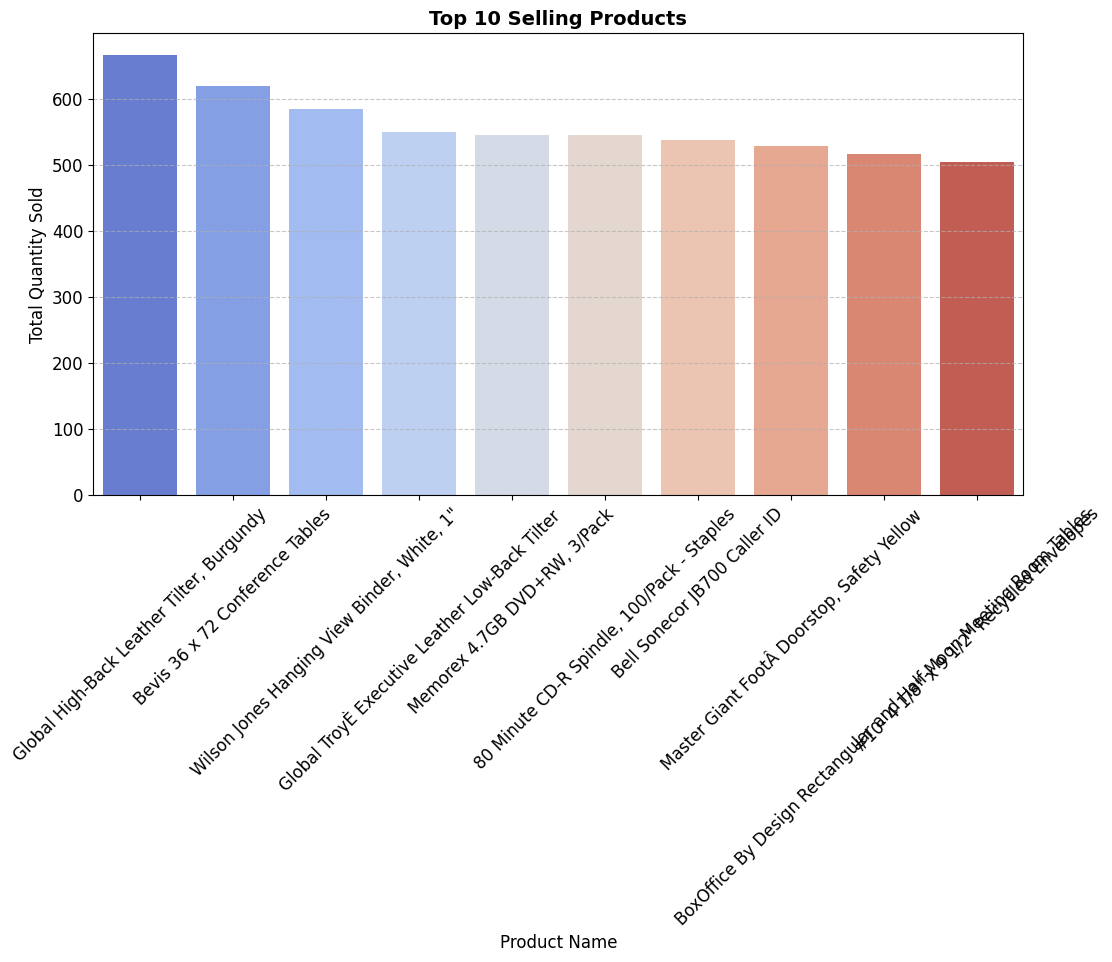

<ipython-input-1-09752fcf032e>:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
<ipython-input-1-09752fcf032e>:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SHIPDATE'] = pd.to_datetime(df['SHIPDATE'], errors='coerce')


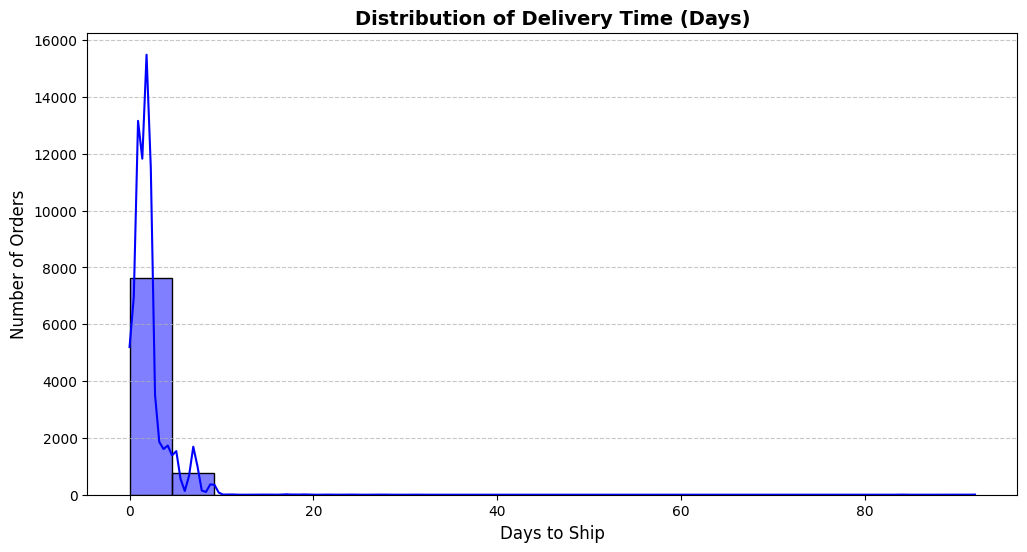

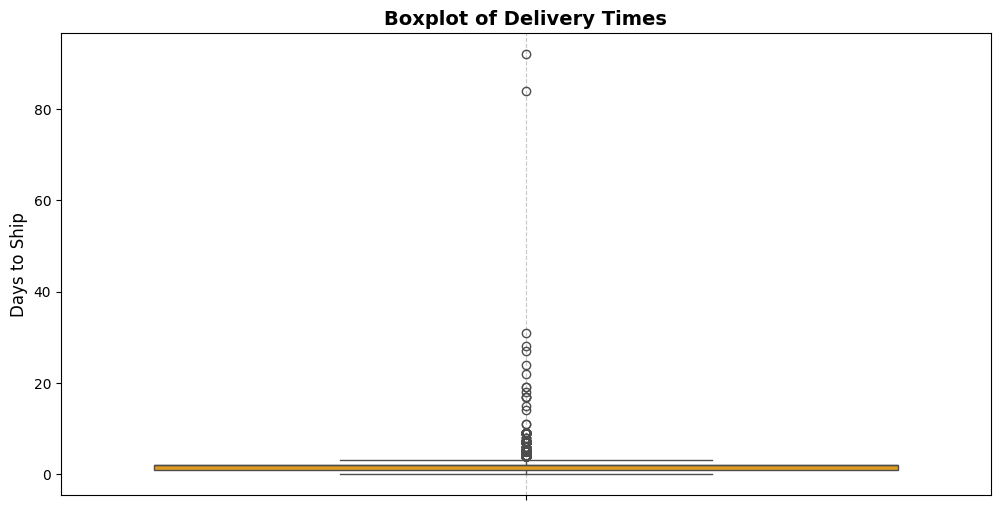

Average Delivery Time: 2.03 days


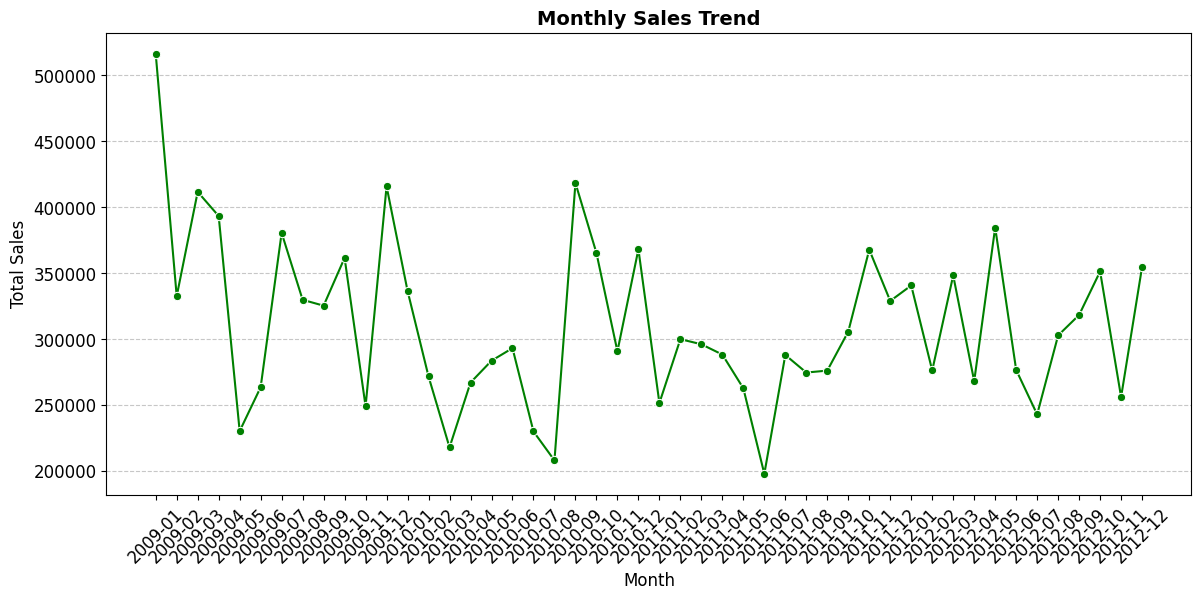

<ipython-input-1-09752fcf032e>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit.index, y=region_profit.values, palette='viridis')


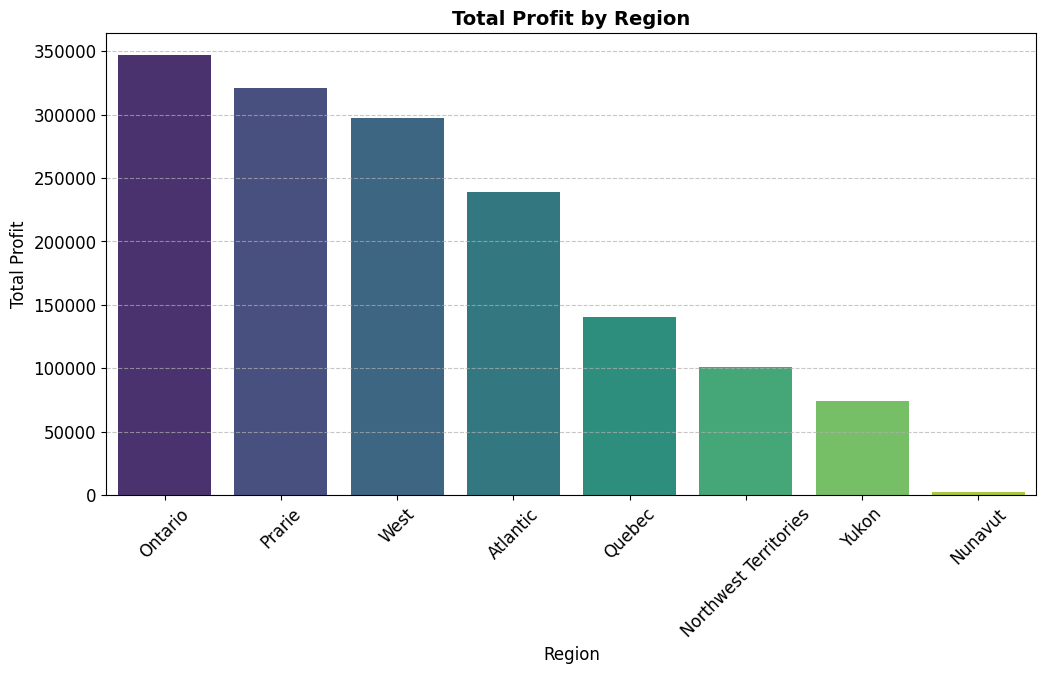

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load dataset with proper encoding
df = pd.read_csv("/content/ORDERS.csv", encoding="ISO-8859-1")

# Display dataset summary
print("Dataset Overview:")
print(df.info())
print(df.head())

### 1. Customer Purchase Patterns ###
# Identify top-selling products and their purchase frequency
if 'PRODUCTNAME' in df.columns and 'ORDERQUANTITY' in df.columns:
    top_products = df.groupby('PRODUCTNAME')['ORDERQUANTITY'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12,6))
    sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.title("Top 10 Selling Products", fontsize=14, fontweight='bold')
    plt.xlabel("Product Name", fontsize=12)
    plt.ylabel("Total Quantity Sold", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Columns 'PRODUCTNAME' or 'ORDERQUANTITY' not found in dataset!")

### 2. Order Fulfillment & Delivery Analysis ###
# Checking delivery efficiency
if 'ORDERDATE' in df.columns and 'SHIPDATE' in df.columns:
    df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
    df['SHIPDATE'] = pd.to_datetime(df['SHIPDATE'], errors='coerce')
    df['DELIVERYTIME'] = (df['SHIPDATE'] - df['ORDERDATE']).dt.days

    plt.figure(figsize=(12,6))
    sns.histplot(df['DELIVERYTIME'].dropna(), bins=20, kde=True, color='blue')
    plt.title("Distribution of Delivery Time (Days)", fontsize=14, fontweight='bold')
    plt.xlabel("Days to Ship", fontsize=12)
    plt.ylabel("Number of Orders", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    plt.figure(figsize=(12,6))
    sns.boxplot(y=df['DELIVERYTIME'].dropna(), color='orange')
    plt.title("Boxplot of Delivery Times", fontsize=14, fontweight='bold')
    plt.ylabel("Days to Ship", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

    avg_delivery_time = df['DELIVERYTIME'].mean()
    print(f"Average Delivery Time: {avg_delivery_time:.2f} days")
else:
    print("Columns 'ORDERDATE' or 'SHIPDATE' not found in dataset!")

### 3. Sales & Profitability Trends ###
# Analyzing sales trends over time
if 'ORDERDATE' in df.columns and 'SALES' in df.columns:
    df['ORDER_MONTH'] = df['ORDERDATE'].dt.to_period('M')
    monthly_sales = df.groupby('ORDER_MONTH')['SALES'].sum()

    plt.figure(figsize=(14,6))
    sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o', color='green')
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.title("Monthly Sales Trend", fontsize=14, fontweight='bold')
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Total Sales", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Columns 'ORDERDATE' or 'SALES' not found in dataset!")

### 4. Profit Analysis by Region ###
# Analyzing profitability across different regions
if 'REGION' in df.columns and 'PROFIT' in df.columns:
    region_profit = df.groupby('REGION')['PROFIT'].sum().sort_values(ascending=False)

    plt.figure(figsize=(12,6))
    sns.barplot(x=region_profit.index, y=region_profit.values, palette='viridis')
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.title("Total Profit by Region", fontsize=14, fontweight='bold')
    plt.xlabel("Region", fontsize=12)
    plt.ylabel("Total Profit", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Columns 'REGION' or 'PROFIT' not found in dataset!")